# 3주차 Neural Network 과제는 인공신경망을 논리게이트부터 차례대로 쌓아올려 직접 짜보는 것입니다.
# 중간 중간 남겨진 주석을 따라 코드를 완성시켜 주세요

## 논리 게이트 구현

In [1]:
## AND gate 구현해주세요
# w1, w2 => 가중치(weight)를 의미하는 변수
# theta : threshold

def AND(x1, x2):
    if x1 and x2:
        return 1
    else:
        return 0


def NAND(x1, x2):
    if x1 and x2:
        return 0
    else:
        return 1


def OR(x1, x2):
    if x1 or x2:
        return 1
    else:
        return 0

# 위 논리 게이트를 조합하여 XOR gate 구현해주세요
def XOR(x1, x2):
    pass_nand = NAND(x1, x2)
    pass_or = OR(x1, x2)
    output = AND(pass_nand, pass_or)
    return output

In [2]:
XOR(1,1), XOR(1,0), XOR(0, 1), XOR(0,0)

(0, 1, 1, 0)

## 활성함수 구현

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 입력할 샘플 데이터를 만들고 확인합니다.
x = np.array([-1, 1, 2])
print("input : ", x)

# 입력 값이 임계값(0)을 넘기는지 판단합니다.
y = x>0
print("Logic : ", y)

# 논리(boolean)형태를 정수형으로 바꾸어 0과 1로 나타냅니다.
y = y.astype(np.int32)
print("Boolean : ", y)

input :  [-1  1  2]
Logic :  [False  True  True]
Boolean :  [0 1 1]


In [4]:
# STEP 함수 구현
def step_function(x):
    return np.where(x > 0, 1, 0)


# 함수가 제대로 만들어 졌는지 값을 출력해봅니다.
print(step_function(-1))	# 0
print(step_function(0.5))	# 1
print(step_function(500000))	# 1

0
1
1


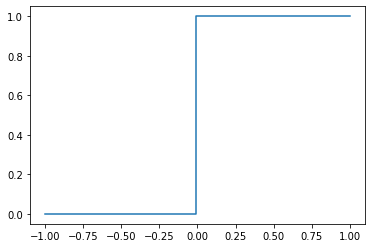

In [5]:
# 구현한 계단 함수의 값을 바탕으로 그래프를 그려봅시다.
x = np.linspace(-1, 1, 100)
plt.step(x, step_function(x))
plt.show()

[0.00669285 0.26894142 0.5        0.52497919 0.99330715 1.        ]


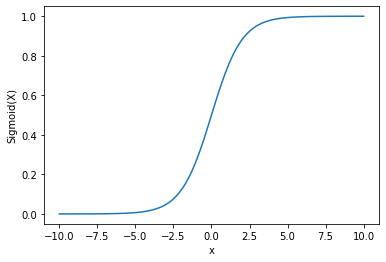

In [6]:
# Sigmoid 함수 구현
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



x = np.array([-5, -1, 0, 0.1, 5, 500000])
print(sigmoid(x))

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

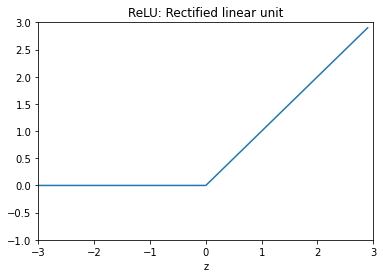

<Figure size 432x288 with 0 Axes>

In [7]:
# ReLU 함수 구현
def ReLU(x):
    return np.where(x > 0, x, 0)
    


x = np.arange(-3, 3, .1)
y = ReLU(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_ylim([-1.0, 3.0])
ax.set_xlim([-3.0, 3.0])
#ax.grid(True)
ax.set_xlabel('z')
ax.set_title('ReLU: Rectified linear unit')

plt.show()
fig = plt.gcf()

## 신경망 구현

In [8]:
def init_network():
    """
    W1,W2 : 가중치
    B1,B2 : 편향
    값은 일단 마음대로 지정한 값이니 신경쓰지 않으셔도 됩니다.
    """
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.7], [0.1, 0.3, 0.3, 0.7], [0.2, 0.1, 0.6, 0.8]]) # 3 x 4
    network['B1'] = np.array([0.11, 0.12, 0.13, 0.14]) # 4개
    network['W2'] = np.array([[0.1, 0.5], [0.2, 0.6], [0.3, 0.4], [0.35, 0.35]]) # 4 x 2
    network['B2'] = np.array([0.1, 0.5]) # 2개

    return network

In [9]:
# 순전파 함수 정의
def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['B1'], network['B2']

    # 아래 빈칸 채워주세요
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1) # 활성화함수 적용
    a2 = np.dot(z1, W2) + b2

    y = a2
    return y

In [10]:
# 네트워크 제작
network = init_network()

# 샘플 입력 데이터
x = np.array([1, 0.5, 0.7])

# 순전파 실행
y = forward(network, x)
print(y)

[0.81956037 1.7977893 ]


## 직접 신경망 만들어보기

In [11]:
# 랜덤 시드(Random Seed)를 고정합니다.
np.random.seed(2020)

# X: 입력(inputs)
X = np.array([
    [0, 0]
    ,[0, 1]
    ,[1, 0]
    ,[1, 1]
])

# 편향(bias)
b = 1

# Y: 타겟값(target, correct outputs)
Y= np.array([[0],[1],[1],[1]])

In [12]:
# 시그모이드 함수
# net: 입력과 가중치의 가중합
def sigmoid(net):
    return 1 / (1 + np.exp(-net))


# 시그모이드 함수의 도함수 구현
# https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
def sigmoid_prime(net):
    sig = sigmoid(net)
    return sig * (1-sig)    ##여기에 도함수 구현

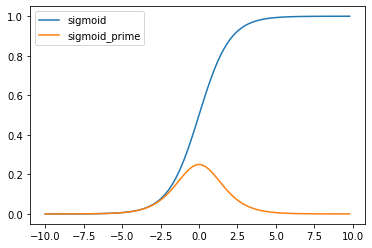

In [13]:
# 시그모이드 함수가 잘 생성되었는지 그래프를 출력해봅시다.
x_range = np.arange(-10., 10., 0.2)
y_range = np.array([sigmoid(x) for x in x_range])
y_prime = np.array([sigmoid_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='sigmoid')
plt.plot(x_range, y_prime, label='sigmoid_prime')
plt.legend()
plt.show();

In [14]:
# 초기 가중치
W = [0.40316676, -0.44345216]

# 입력 데이터와 가중치 연산
Z = np.dot(X, W) + b                   #Feedforward 연산 참고하여 코드 작성

"""
array([[1.        ],
       [0.55654784],
       [1.40316676],
       [0.9597146 ]])
"""
print(Z)

[1.         0.55654784 1.40316676 0.9597146 ]


In [15]:
# A: 출력(activated outputs)
A = sigmoid(Z)
A

"""
array([[0.73105858],
       [0.6356534 ],
       [0.80268592],
       [0.72306466]])
"""
print(A)

[0.73105858 0.6356534  0.80268592 0.72306466]


## 미분한 값을 코드로 구현
=> 출력 오차를 줄이기 위한 역전파(경사하강법 이용)

경사 하강법(Gradient descent) : 손실 값이 최소가 되는 가중치(weight)를 찾는 방법
역전파 알고리즘 : 경사 하강법에 필요한 미분값을 빠르고 효율적으로 찾는 알고리즘

da = ∂E/∂A (MSE를 미분하여 나오는 값)
dz = ∂E/∂z
dw, db = 각각 가중치(weight), 편향(bias) 업데이트 값

In [16]:
def backpropagation(Y, A, Z):
    Y = Y.reshape(-1)
    da = A - Y  # MSE를 미분한 값
    dz =  da * sigmoid_prime(Z) # z에 대한 미분

    dw = np.dot(dz, X) # 가중치의 업데이트 값
    
    db = np.sum(da)  # 편향의 업데이트 값
    
    print("dz : \n", dz, "\n")
    print("dw : \n", dw, "\n")
    print("db : \n", db, "\n")
    return dw,db

"""
dz :
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]]

dw :
 [[-0.08670498]
 [-0.13983613]]

db :
 [[-0.10753744]]
"""

dw, db =  backpropagation(Y, A, Z)

dz : 
 [ 0.14373484 -0.084382   -0.03125085 -0.05545413] 

dw : 
 [-0.08670498 -0.13983613] 

db : 
 -0.10753743559028228 



In [17]:
print("기존 가중치: \n", W, "\n")
"""
기존 가중치:
 [[ 0.40316676]
 [-0.44345216]]
"""

기존 가중치: 
 [0.40316676, -0.44345216] 



'\n기존 가중치:\n [[ 0.40316676]\n [-0.44345216]]\n'

In [18]:
# 가중치 업데이트(batch)


W += dw
b += db

print("업데이트 후 가중치: \n", W, "\n")
print("업데이트 후 bias: \n", b, "\n")

"""
업데이트 후 가중치:
 [[ 0.31646178]
 [-0.58328829]]

업데이트 후 bias:
 [[0.89246256]]
"""

업데이트 후 가중치: 
 [ 0.31646178 -0.58328829] 

업데이트 후 bias: 
 0.8924625644097177 



'\n업데이트 후 가중치:\n [[ 0.31646178]\n [-0.58328829]]\n\n업데이트 후 bias:\n [[0.89246256]]\n'

In [19]:
## 최적 가중치 찾기
# 이미 입력 데이터와 타겟 출력은 윗 부분에서 선언함

# 가중치 초기화
# 아래 각주 코드 하나씩 실행하여 결과값 달라지는 확인해보시기 바랍니다

# W = 2 * np.random.random((2,1)) - 1
W =  [-0.79003947, 0.6826574 ]
# W = np.zeros((2,1))

b = 0

print('학습 전 가중치: \n', W)

# 가중치 업데이트 10,000회 (10,000 epoch)

for iteration in range(1000):

    # 순방향 전파
    Z = np.dot(X, W) + b
    A = sigmoid(Z)

    # 역방향 전파(기울기 계산)
    backpropagation(Y, A, Z)

    W += dw
    b += db

print('학습 후 가중치: \n', W, "\n")
print('학습 후 bias: \n', b, "\n")
print('학습 후 예측값: \n', A.round(3), "\n")

"""
학습 후 가중치:
 [[5.92060487]
 [5.92082351]]

학습 후 bias:
 [[-2.59025899]]

학습 후 예측값:
 [[0.07 ]
 [0.965]
 [0.965]
 [1.   ]]
"""

학습 전 가중치: 
 [-0.79003947, 0.6826574]
dz : 
 [ 0.125      -0.07485244 -0.14769035 -0.131326  ] 

dw : 
 [-0.27901635 -0.20617843] 

db : 
 -1.0503280133599837 

dz : 
 [ 0.11794407 -0.09370708 -0.1441614  -0.14497294] 

dw : 
 [-0.28913434 -0.23868002] 

db : 
 -1.2562878084407683 

dz : 
 [ 0.1103286  -0.11229583 -0.13759943 -0.14781642] 

dw : 
 [-0.28541585 -0.26011224] 

db : 
 -1.4561228532660384 

dz : 
 [ 0.1023242  -0.12860165 -0.12868883 -0.14023385] 

dw : 
 [-0.26892268 -0.2688355 ] 

db : 
 -1.644706824308162 

dz : 
 [ 0.09410221 -0.14069072 -0.11817759 -0.12499676] 

dw : 
 [-0.24317435 -0.26568747] 

db : 
 -1.8184056114754534 

dz : 
 [ 0.08582722 -0.14718386 -0.10678363 -0.10579455] 

dw : 
 [-0.21257818 -0.25297841] 

db : 
 -1.975174336885612 

dz : 
 [ 0.07765055 -0.14757577 -0.09513016 -0.0859016 ] 

dw : 
 [-0.18103176 -0.23347737] 

db : 
 -2.1143411428815764 

dz : 
 [ 0.06970514 -0.14228204 -0.08371202 -0.06752768] 

dw : 
 [-0.1512397  -0.20980972] 

db : 
 -2.

 [-1.06593539e-11 -5.75338060e-14] 

db : 
 -2.9999986955250995 

dz : 
 [ 1.37232854e-12 -4.49248444e-14 -8.77753264e-12 -3.36611713e-19] 

dw : 
 [-8.77753298e-12 -4.49251810e-14] 

db : 
 -2.9999988285262194 

dz : 
 [ 1.10675737e-12 -3.50795172e-14 -7.22793179e-12 -2.41013160e-19] 

dw : 
 [-7.22793203e-12 -3.50797582e-14] 

db : 
 -2.9999989479668194 

dz : 
 [ 8.92579137e-13 -2.73918038e-14 -5.95190016e-12 -1.72564831e-19] 

dw : 
 [-5.95190034e-12 -2.73919764e-14] 

db : 
 -2.9999990552295106 

dz : 
 [ 7.19848373e-13 -2.13888610e-14 -4.90114138e-12 -1.23555995e-19] 

dw : 
 [-4.90114150e-12 -2.13889846e-14] 

db : 
 -2.999999151555932 

dz : 
 [ 5.80544226e-13 -1.67014695e-14 -4.03588537e-12 -8.84657890e-20] 

dw : 
 [-4.03588546e-12 -1.67015579e-14] 

db : 
 -2.9999992380611284 

dz : 
 [ 4.68198029e-13 -1.30413247e-14 -3.32338316e-12 -6.33412876e-20] 

dw : 
 [-3.32338322e-12 -1.30413881e-14] 

db : 
 -2.9999993157464537 

dz : 
 [ 3.77592920e-13 -1.01833046e-14 -2.73666733e-

dz : 
 [ 2.08369452e-19 -6.45475026e-22 -6.09829878e-18 -8.62325279e-30] 

dw : 
 [-6.09829878e-18 -6.45475035e-22] 

db : 
 -2.999999999543525 

dz : 
 [ 1.68046016e-19 -5.04018491e-22 -5.02169453e-18 -6.17422782e-30] 

dw : 
 [-5.02169453e-18 -5.04018497e-22] 

db : 
 -2.9999999995900657 

dz : 
 [ 1.35525928e-19 -3.93562304e-22 -4.13515586e-18 -4.42073196e-30] 

dw : 
 [-4.13515586e-18 -3.93562309e-22] 

db : 
 -2.9999999996318616 

dz : 
 [ 1.09299094e-19 -3.07312709e-22 -3.40512827e-18 -3.16523323e-30] 

dw : 
 [-3.40512827e-18 -3.07312712e-22] 

db : 
 -2.999999999669396 

dz : 
 [ 8.81476484e-20 -2.39964803e-22 -2.80398101e-18 -2.26629922e-30] 

dw : 
 [-2.80398101e-18 -2.39964805e-22] 

db : 
 -2.9999999997031033 

dz : 
 [ 7.10894085e-20 -1.87376262e-22 -2.30896134e-18 -1.62266467e-30] 

dw : 
 [-2.30896134e-18 -1.87376264e-22] 

db : 
 -2.999999999733374 

dz : 
 [ 5.73322613e-20 -1.46312556e-22 -1.90133329e-18 -1.16182392e-30] 

dw : 
 [-1.90133329e-18 -1.46312557e-22] 

db 


dw : 
 [-2.11235135e-28 -3.07744718e-35] 

db : 
 -2.999999999999999 

dz : 
 [ 4.39648232e-31 -2.40302137e-35 -1.73943318e-28 -6.30394937e-48] 

dw : 
 [-1.73943318e-28 -2.40302137e-35] 

db : 
 -2.999999999999999 

dz : 
 [ 3.54567971e-31 -1.87639669e-35 -1.43235062e-28 -4.51361227e-48] 

dw : 
 [-1.43235062e-28 -1.87639669e-35] 

db : 
 -2.9999999999999996 

dz : 
 [ 2.85952351e-31 -1.46518237e-35 -1.17948096e-28 -3.23173530e-48] 

dw : 
 [-1.17948096e-28 -1.46518237e-35] 

db : 
 -2.9999999999999996 

dz : 
 [ 2.30615154e-31 -1.14408610e-35 -9.71253343e-29 -2.31391454e-48] 

dw : 
 [-9.71253343e-29 -1.14408610e-35] 

db : 
 -2.9999999999999996 

dz : 
 [ 1.85986753e-31 -8.93358419e-36 -7.99786591e-29 -1.65675713e-48] 

dw : 
 [-7.99786591e-29 -8.93358419e-36] 

db : 
 -2.9999999999999996 

dz : 
 [ 1.49994793e-31 -6.97577975e-36 -6.58590878e-29 -1.18623403e-48] 

dw : 
 [-6.58590878e-29 -6.97577975e-36] 

db : 
 -2.9999999999999996 

dz : 
 [ 1.20967959e-31 -5.44703023e-36 -5.4232

db : 
 -3.0 

dz : 
 [ 3.50156563e-38 -1.64380982e-43 -6.74790208e-35 -5.92774084e-59] 

dw : 
 [-6.74790208e-35 -1.64380982e-43] 

db : 
 -3.0 

dz : 
 [ 2.82394634e-38 -1.28356716e-43 -5.55661573e-35 -4.24424789e-59] 

dw : 
 [-5.55661573e-35 -1.28356716e-43] 

db : 
 -3.0 

dz : 
 [ 2.27745923e-38 -1.00227206e-43 -4.57564115e-35 -3.03887106e-59] 

dw : 
 [-4.57564115e-35 -1.00227206e-43] 

db : 
 -3.0 

dz : 
 [ 1.83672772e-38 -7.82623074e-44 -3.76784952e-35 -2.17582422e-59] 

dw : 
 [-3.76784952e-35 -7.82623074e-44] 

db : 
 -3.0 

dz : 
 [ 1.48128611e-38 -6.11110398e-44 -3.10266682e-35 -1.55788480e-59] 

dw : 
 [-3.10266682e-35 -6.11110398e-44] 

db : 
 -3.0 

dz : 
 [ 1.19462919e-38 -4.77184907e-44 -2.55491664e-35 -1.11544169e-59] 

dw : 
 [-2.55491664e-35 -4.77184907e-44] 

db : 
 -3.0 

dz : 
 [ 9.63445809e-39 -3.72609329e-44 -2.10386722e-35 -7.98653511e-60] 

dw : 
 [-2.10386722e-35 -3.72609329e-44] 

db : 
 -3.0 

dz : 
 [ 7.77000793e-39 -2.90951600e-44 -1.73244685e-35 -5.718

 -3.0 

dz : 
 [ 2.75411441e-52 -9.85082091e-60 -1.23324461e-47 -7.32033000e-81] 

dw : 
 [-1.23324461e-47 -9.85082091e-60] 

db : 
 -3.0 

dz : 
 [ 2.22114110e-52 -7.69200307e-60 -1.01552546e-47 -5.24133830e-81] 

dw : 
 [-1.01552546e-47 -7.69200307e-60] 

db : 
 -3.0 

dz : 
 [ 1.79130822e-52 -6.00629245e-60 -8.36242835e-48 -3.75278535e-81] 

dw : 
 [-8.36242835e-48 -6.00629245e-60] 

db : 
 -3.0 

dz : 
 [ 1.44465614e-52 -4.69000710e-60 -6.88611074e-48 -2.68698510e-81] 

dw : 
 [-6.88611074e-48 -4.69000710e-60] 

db : 
 -3.0 

dz : 
 [ 1.16508781e-52 -3.66218707e-60 -5.67042479e-48 -1.92387473e-81] 

dw : 
 [-5.67042479e-48 -3.66218707e-60] 

db : 
 -3.0 

dz : 
 [ 9.39621249e-53 -2.85961490e-60 -4.66935816e-48 -1.37748958e-81] 

dw : 
 [-4.66935816e-48 -2.85961490e-60] 

db : 
 -3.0 

dz : 
 [ 7.57786737e-53 -2.23292726e-60 -3.84502156e-48 -9.86279159e-82] 

dw : 
 [-3.84502156e-48 -2.23292726e-60] 

db : 
 -3.0 

dz : 
 [ 6.11140647e-53 -1.74357889e-60 -3.16621478e-48 -7.06173456e

db : 
 -3.0 

dz : 
 [ 4.18173402e-59 -1.41535468e-67 -8.56811862e-54 -1.87530777e-91] 

dw : 
 [-8.56811862e-54 -1.41535468e-67] 

db : 
 -3.0 

dz : 
 [ 3.37248927e-59 -1.10517820e-67 -7.05548809e-54 -1.34271576e-91] 

dw : 
 [-7.05548809e-54 -1.10517820e-67] 

db : 
 -3.0 

dz : 
 [ 2.71984871e-59 -8.62977230e-68 -5.80989997e-54 -9.61381186e-92] 

dw : 
 [-5.80989997e-54 -8.62977230e-68] 

db : 
 -3.0 

dz : 
 [ 2.19350646e-59 -6.73854856e-68 -4.78421015e-54 -6.88346568e-92] 

dw : 
 [-4.78421015e-54 -6.73854856e-68] 

db : 
 -3.0 

dz : 
 [ 1.76902140e-59 -5.26178850e-68 -3.93959738e-54 -4.92854452e-92] 

dw : 
 [-3.93959738e-54 -5.26178850e-68] 

db : 
 -3.0 

dz : 
 [ 1.42668225e-59 -4.10866198e-68 -3.24409402e-54 -3.52882578e-92] 

dw : 
 [-3.24409402e-54 -4.10866198e-68] 

db : 
 -3.0 

dz : 
 [ 1.15059221e-59 -3.20824435e-68 -2.67137603e-54 -2.52663059e-92] 

dw : 
 [-2.67137603e-54 -3.20824435e-68] 

db : 
 -3.0 

dz : 
 [ 9.27930817e-60 -2.50515421e-68 -2.19976667e-54 -1.809

 [ 5.88612494e-074 -1.17225567e-084 -3.31053865e-067 -1.59958111e-114] 

dw : 
 [-3.31053865e-67 -1.17225567e-84] 

db : 
 -3.0 

dz : 
 [ 4.74704825e-074 -9.15354598e-085 -2.72609041e-067 -1.14529615e-114] 

dw : 
 [-2.72609041e-67 -9.15354598e-85] 

db : 
 -3.0 

dz : 
 [ 3.82840449e-074 -7.14753668e-085 -2.24482168e-067 -8.20029228e-115] 

dw : 
 [-2.24482168e-67 -7.14753668e-85] 

db : 
 -3.0 

dz : 
 [ 3.08753569e-074 -5.58114645e-085 -1.84851696e-067 -5.87138914e-115] 

dw : 
 [-1.84851696e-67 -5.58114645e-85] 

db : 
 -3.0 

dz : 
 [ 2.49003905e-074 -4.35803229e-085 -1.52217657e-067 -4.20390020e-115] 

dw : 
 [-1.52217657e-67 -4.35803229e-85] 

db : 
 -3.0 

dz : 
 [ 2.00816932e-074 -3.40296490e-085 -1.25344888e-067 -3.00998222e-115] 

dw : 
 [-1.25344888e-67 -3.40296490e-85] 

db : 
 -3.0 

dz : 
 [ 1.61955051e-074 -2.65720154e-085 -1.03216284e-067 -2.15513988e-115] 

dw : 
 [-1.03216284e-67 -2.65720154e-85] 

db : 
 -3.0 

dz : 
 [ 1.30613681e-074 -2.07487300e-085 -8.49943016e

 [ 9.52068139e-080 -2.55963431e-091 -1.94839673e-072 -1.61629749e-123] 

dw : 
 [-1.94839673e-72 -2.55963431e-91] 

db : 
 -3.0 

dz : 
 [ 7.67824918e-080 -1.99868774e-091 -1.60442339e-072 -1.15726504e-123] 

dw : 
 [-1.60442339e-72 -1.99868774e-91] 

db : 
 -3.0 

dz : 
 [ 6.19236250e-080 -1.56067321e-091 -1.32117570e-072 -8.28598924e-124] 

dw : 
 [-1.32117570e-72 -1.56067321e-91] 

db : 
 -3.0 

dz : 
 [ 4.99402305e-080 -1.21865002e-091 -1.08793305e-072 -5.93274795e-124] 

dw : 
 [-1.08793305e-72 -1.21865002e-91] 

db : 
 -3.0 

dz : 
 [ 4.02758498e-080 -9.51581577e-092 -8.95867459e-073 -4.24783296e-124] 

dw : 
 [-8.95867459e-73 -9.51581577e-92] 

db : 
 -3.0 

dz : 
 [ 3.24817099e-080 -7.43041467e-092 -7.37709462e-073 -3.04143797e-124] 

dw : 
 [-7.37709462e-73 -7.43041467e-92] 

db : 
 -3.0 

dz : 
 [ 2.61958837e-080 -5.80203142e-092 -6.07472953e-073 -2.17766212e-124] 

dw : 
 [-6.07472953e-73 -5.80203142e-92] 

db : 
 -3.0 

dz : 
 [ 2.11264839e-080 -4.53051009e-092 -5.00228624e

 [ 4.18441141e-093 -1.10984562e-106 -1.68432194e-084 -2.88981798e-144] 

dw : 
 [-1.68432194e-084 -1.10984562e-106] 

db : 
 -3.0 

dz : 
 [ 3.37464853e-093 -8.66621775e-107 -1.38696882e-084 -2.06910258e-144] 

dw : 
 [-1.38696882e-084 -8.66621775e-107] 

db : 
 -3.0 

dz : 
 [ 2.72159011e-093 -6.76700695e-107 -1.14211094e-084 -1.48147236e-144] 

dw : 
 [-1.14211094e-084 -6.76700695e-107] 

db : 
 -3.0 

dz : 
 [ 2.19491086e-093 -5.28401021e-107 -9.40480690e-085 -1.06073057e-144] 

dw : 
 [-9.40480690e-085 -5.28401021e-107] 

db : 
 -3.0 

dz : 
 [ 1.77015403e-093 -4.12601377e-107 -7.74446597e-085 -7.59480486e-145] 

dw : 
 [-7.74446597e-085 -4.12601377e-107] 

db : 
 -3.0 

dz : 
 [ 1.42759569e-093 -3.22179348e-107 -6.37724450e-085 -5.43786163e-145] 

dw : 
 [-6.37724450e-085 -3.22179348e-107] 

db : 
 -3.0 

dz : 
 [ 1.15132888e-093 -2.51573403e-107 -5.25139469e-085 -3.89349557e-145] 

dw : 
 [-5.25139469e-085 -2.51573403e-107] 

db : 
 -3.0 

dz : 
 [ 9.28524931e-094 -1.96440825e-10

'\n학습 후 가중치:\n [[5.92060487]\n [5.92082351]]\n\n학습 후 bias:\n [[-2.59025899]]\n\n학습 후 예측값:\n [[0.07 ]\n [0.965]\n [0.965]\n [1.   ]]\n'

## IRIS DATA PERCEPTRON 학습예제

In [20]:
### 1. 필요한 패키지를 import 하고 Iris 데이터셋 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iris 데이터를 DataFrame 형태로 불러옵니다.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

### 아래 제공된 전처리 코드를 참고하여 자신만의 전처리 코드를 작성해봅니다.

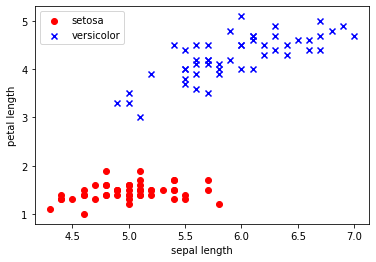

In [21]:

### 2. 데이터 전처리(Preprocessing) 및 시각화(Visualization)
# 50 setosa, 50 versicolor 데이터만 사용하여 이진 분류(Binary Classification) 문제를 풀어보겠습니다.

y = df.iloc[0:100, 4].values
y
"""
array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)
"""

# 타겟 레이블을 setosa = -1, versicolor = 1 로 바꾸기
y = np.where(y == 'Iris-setosa', -1, 1)
y
"""
array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])
"""

# 두 개의 특성(sepal length, petal length)만 사용
X = df.iloc[0:100, [0, 2]].values
X.shape
"""
(100, 2)
"""

# 두 특성에 따라 데이터 시각화
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

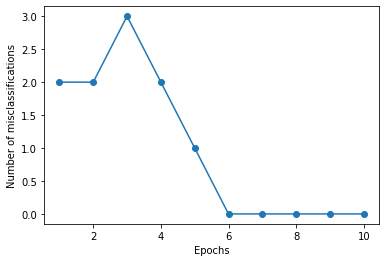

In [22]:
### 퍼셉트론(Perceptron)을 구현
class Perceptron:
    # niter = iteration 의 횟수입니다.
    # iteration에 대해서는 다음 강의에서 자세히 배울 것이므로 반복 횟수 정도로만 이해하셔도 충분합니다.
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """
        퍼셉트론을 학습시키는 코드입니다.

        X : 학습되는 데이터에 해당하는 벡터입니다.
        X.shape -> [샘플의 수, 특성의 수] 가 되어야 합니다.

        y : 타겟값입니다.
        y.shape -> [샘플의 수] 가 되어야 합니다.
        """

        # 초기 가중치는 [0, 0, 0] 으로 설정합니다.
        self.weight = np.zeros(1 + X.shape[1])

        # 오분류(mis-classification)된 데이터의 수
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """
        입력값을 받아 가중치, 편향과 연산해줍니다.
        """
        return np.dot(X, self.weight[1:]) + self.weight[0] 

    def predict(self, X):
        """
        학습 후 가중치를 바탕으로 데이터의 클래스를 예측합니다.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


### 4. 퍼셉트론에 데이터 넣어 가중치를 학습
# 학습률(learning rate): 0.1, iteration(epoch): 10
# 퍼셉트론을 학습시키고 오분류(mis-classification)의 변화를 살펴보겠습니다.
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

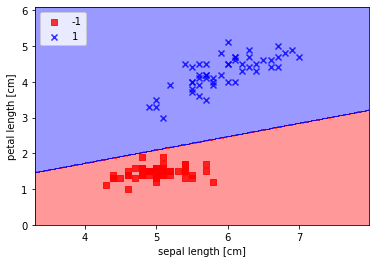

In [23]:
### 데이터가 잘 분류 되었는지 확인
# 퍼셉트론의 결정 경계를 확인해 보겠습니다.
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 그래프 요소를 세팅하여줍니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계면을 그려보겠습니다.
    x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, color=cmap(idx),
        marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## 고생하셨습니다